In [49]:
import pandas as pd
data = pd.read_csv("SMSSpamCollection", delimiter='\t',header=None)
data

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [50]:
data[data[0]=='ham'][0].count() # 4825 条正常信息
data[data[0]=='spam'][0].count() # 747 条垃圾信息

747

In [51]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

X = data[1].values
y = data[0].values
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=520)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
for i, pred_i in enumerate(pred[:5]):
    print("预测为：%s, 信息为：%s,真实为：%s" %(pred_i,X_test_raw[i],y_test[i]))

预测为：0, 信息为：Aww that's the first time u said u missed me without asking if I missed u first. You DO love me! :),真实为：[0]
预测为：0, 信息为：Poor girl can't go one day lmao,真实为：[0]
预测为：0, 信息为：Also remember the beads don't come off. Ever.,真实为：[0]
预测为：0, 信息为：I see the letter B on my car,真实为：[0]
预测为：0, 信息为：My love ! How come it took you so long to leave for Zaher's? I got your words on ym and was happy to see them but was sad you had left. I miss you,真实为：[0]


C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


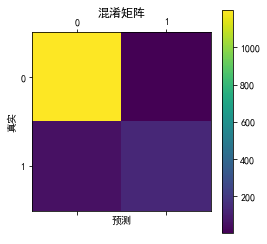

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_matrix = confusion_matrix(y_test, pred)
plt.matshow(confusion_matrix)
plt.rcParams["font.sans-serif"]= 'SimHei' # 消除中文乱码
plt.title("混淆矩阵")
plt.ylabel('真实')
plt.xlabel('预测')
plt.colorbar()

In [53]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

# help(cross_val_score)

C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracies: [0.94976077 0.95933014 0.96650718 0.95215311 0.95688623]
Mean accuracy: 0.9569274847434318


C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
precisions = precision_score(y_test, pred)
print('Precision: %s' % precisions)
recalls = recall_score(y_test, pred)
print('Recall: %s' % recalls)

Precision: 0.9852941176470589
Recall: 0.6979166666666666


In [60]:
f1s = f1_score(y_test, pred)
print('F1 score: %s' % f1s)

F1 score: 0.8170731707317074


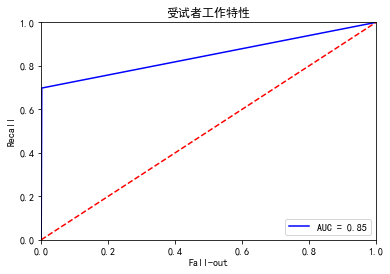

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate, recall, thresholds = roc_curve(y_test, pred)
roc_auc_score  = roc_auc_score(y_test, pred)

plt.title('受试者工作特性')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc_score)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score


pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}

if __name__ == "__main__":
    df = pd.read_csv('./SMSSpamCollection', delimiter='\t', header=None)
    X = df[1].values
    y = df[0].values
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    grid_search.fit(X_train, y_train)
    
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
        
    predictions = grid_search.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_test, predictions))
    print('Precision: %s' % precision_score(y_test, predictions))
    print('Recall: %s' % recall_score(y_test, predictions))

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  1.0min finished


Best score: 0.985
Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 2)
	vect__stop_words: None
	vect__use_idf: True
Accuracy: 0.9791816223977028
Precision: 1.0
Recall: 0.8605769230769231


In [73]:
data = pd.read_csv("./chapter5_movie_train.csv",header=0,delimiter='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [75]:
data['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [76]:
data["Sentiment"].value_counts()/data["Sentiment"].count()

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./chapter5_movie_train.csv', header=0, delimiter='\t')
X, y = df['Phrase'], df['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.8min finished


Best score: 0.619
Best parameters set:
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: False


C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
predictions = grid_search.predict(X_test)

print('Accuracy: %s' % accuracy_score(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.6292323465333846
Confusion Matrix:
[[ 1013  1742   682   106    11]
 [  794  5914  6275   637    49]
 [  196  3207 32397  3686   222]
 [   28   488  6513  8131  1299]
 [    1    59   548  2388  1644]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.29      0.36      3554
           1       0.52      0.43      0.47     13669
           2       0.70      0.82      0.75     39708
           3       0.54      0.49      0.52     16459
           4       0.51      0.35      0.42      4640

    accuracy                           0.63     78030
   macro avg       0.55      0.48      0.50     78030
weighted avg       0.61      0.63      0.62     78030



In [85]:
from sklearn.metrics import hamming_loss, jaccard_score
# help(jaccard_score)

print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))

print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))

print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))

print(jaccard_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]]),average=None))

print(jaccard_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]]),average=None))

print(jaccard_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]]),average=None))

0.0
0.25
0.5
[1. 1.]
[0.5 1. ]
[0. 1.]
